In [3]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import performance_metrics
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('product_dataset.csv')

In [3]:
df.head(5)

,Ordered_Product_Id,order_date,qty
0,11420442,2019-01-01,7
1,11420442,2019-01-03,4
2,11420442,2019-01-04,1
3,11420442,2019-01-05,6
4,11420442,2019-01-06,3


In [4]:
del df['Ordered_Product_Id']

In [9]:
df = df.set_index('order_date')
df

,qty
order_date,
2019-01-01,7
2019-01-03,4
2019-01-04,1
2019-01-05,6
2019-01-06,3
...,...
2020-12-02,2
2020-12-03,4
2020-12-04,9


# Sparsity Analysis

In [16]:
df.index = pd.DatetimeIndex(df.index)

In [20]:
df = df.reindex(pd.date_range('2019-01-01', '2020-12-31'), fill_value=np.nan)

In [28]:
print('Percentage sparsity: ',round((df.isnull().sum()[0]/df.shape[0]) * 100,2), "%")

Percentage sparsity:  40.77 %


# Persistence Model

In [196]:
df = pd.read_csv('product_dataset.csv', parse_dates=['order_date'])
df.drop(columns=['Ordered_Product_Id'], inplace=True)
df.rename(columns={'order_date': 'ds', 'qty': 'y'}, inplace=True)
df = df.set_index(['ds'])

In [197]:
test_df = df.loc['2019-12-31':'2020-01-14']
test_df.index = pd.DatetimeIndex(test_df.index)
test_df = test_df.reindex(pd.date_range('2019-12-31', '2020-01-14'), fill_value=np.nan)

In [198]:
test_df['y_hat'] = np.nan

In [199]:
idx = test_df.index
for i, ix in enumerate(idx):
    if (i==0):
        continue
    else:
        test_df.loc[ix, 'y_hat'] = test_df.loc[idx[i-1], 'y']

In [200]:
test_df['y_hat'] = test_df['y_hat'].ffill()

In [201]:
test_df = test_df.loc['2020-01-01':]

In [202]:
test_df['y'] = test_df['y'].fillna(0)

In [204]:
mean_absolute_error(test_df['y'], test_df['y_hat'])

4.642857142857143

# Sales from last 90 days

In [276]:
df = pd.read_csv('product_dataset.csv', parse_dates=['order_date'])
df.drop(columns=['Ordered_Product_Id'], inplace=True)
df.rename(columns={'order_date': 'ds', 'qty': 'y'}, inplace=True)
df = df.set_index(['ds'])

In [277]:
df.index = pd.DatetimeIndex(df.index)
df_val = df.reindex(pd.date_range('2019-12-31', '2020-01-14'), fill_value=0)

In [278]:
df_val['y_hat'] = np.nan

In [291]:
df_val.index.values

array(['2019-12-31T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-11T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [299]:
for index in df_val.index:
    upto = index - dt.timedelta(1)
    fro  = index - dt.timedelta(91)
    print(index, upto, fro)
    mean = df.loc[fro:upto].mean()[0]
    print(mean)
    df_val.loc[index, 'y_hat'] = mean

2019-12-31 00:00:00 2019-12-30 00:00:00 2019-10-01 00:00:00
3.719298245614035
2020-01-01 00:00:00 2019-12-31 00:00:00 2019-10-02 00:00:00
3.736842105263158
2020-01-02 00:00:00 2020-01-01 00:00:00 2019-10-03 00:00:00
3.6842105263157894
2020-01-03 00:00:00 2020-01-02 00:00:00 2019-10-04 00:00:00
3.7017543859649122
2020-01-04 00:00:00 2020-01-03 00:00:00 2019-10-05 00:00:00
3.706896551724138
2020-01-05 00:00:00 2020-01-04 00:00:00 2019-10-06 00:00:00
3.896551724137931
2020-01-06 00:00:00 2020-01-05 00:00:00 2019-10-07 00:00:00
3.9310344827586206
2020-01-07 00:00:00 2020-01-06 00:00:00 2019-10-08 00:00:00
3.982456140350877
2020-01-08 00:00:00 2020-01-07 00:00:00 2019-10-09 00:00:00
3.892857142857143
2020-01-09 00:00:00 2020-01-08 00:00:00 2019-10-10 00:00:00
3.9454545454545453
2020-01-10 00:00:00 2020-01-09 00:00:00 2019-10-11 00:00:00
3.9454545454545453
2020-01-11 00:00:00 2020-01-10 00:00:00 2019-10-12 00:00:00
3.9814814814814814
2020-01-12 00:00:00 2020-01-11 00:00:00 2019-10-13 00:00:0

In [300]:
df_val

,y,y_hat
2019-12-31,2,3.719298
2020-01-01,3,3.736842
2020-01-02,5,3.684211
2020-01-03,4,3.701754
2020-01-04,15,3.706897
2020-01-05,5,3.896552
2020-01-06,0,3.931034
2020-01-07,0,3.982456
2020-01-08,0,3.892857
2020-01-09,0,3.945455


In [301]:
mean_absolute_error(df_val['2020-01-01':]['y'], df_val['2020-01-01':]['y_hat'])

3.2474216503238713

# Facebook Prophet Model

In [4]:
df = pd.read_csv('product_dataset.csv')
df.drop(columns=['Ordered_Product_Id'], inplace=True)
df.rename(columns={'order_date': 'ds', 'qty': 'y'}, inplace=True)
df = df.set_index(['ds'])

In [5]:
train_df = df.loc['2019-01-01':'2019-12-31']

In [6]:
test_df = df.loc['2020-01-01':'2020-01-14']

In [7]:
test_df.index = pd.DatetimeIndex(test_df.index)

In [8]:
test_df = test_df.reindex(pd.date_range('2020-01-01', '2020-01-14'), fill_value=np.nan)

In [9]:
test_df.index.name='ds'

In [10]:
%%time
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(train_df.reset_index())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 698 ms, sys: 156 ms, total: 854 ms
Wall time: 1.14 s


In [11]:
forecast_train = model.predict(train_df.reset_index())
forecast_train['y'] = train_df.reset_index()['y']

forecast_test = model.predict(test_df.reset_index())
forecast_test['y'] = test_df.reset_index()['y']

In [12]:
results = forecast_train.append(forecast_test)

In [13]:
results = results.set_index('ds')

Text(0.5, 1.0, 'Test')

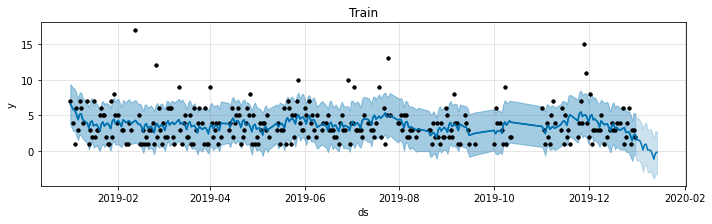

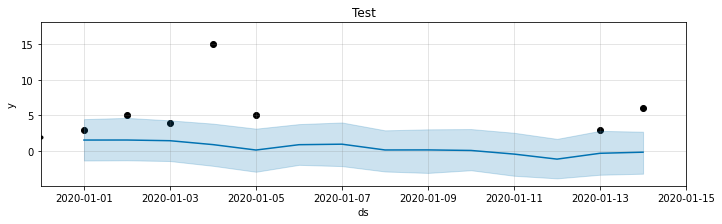

In [14]:
f, ax = plt.subplots(1)
f.set_figheight(3)
f.set_figwidth(10)
#ax.scatter(forecast_train['ds'], forecast_train['y'], color='black')
# ax.axvline(dt.datetime(2020, 1, 1))
fig = model.plot(forecast_train, ax=ax)

model.plot(forecast_train.append(forecast_test), ax=ax)
ax.set_title('Train')

f, ax = plt.subplots(1)
f.set_figheight(3)
f.set_figwidth(10)
ax.scatter(forecast_test.set_index('ds').index, forecast_test['y'], color='black')
fig = model.plot(forecast_test, ax=ax)
ax.set_xbound(lower=dt.datetime(2019, 12, 31), upper=dt.datetime(2020, 1, 15))
ax.set_title('Test')

In [15]:
forecast_test['y'] = forecast_test['y'].fillna(0)

In [16]:
mean_absolute_error(forecast_test['y'], forecast_test['yhat_upper'])

2.8366533575184825

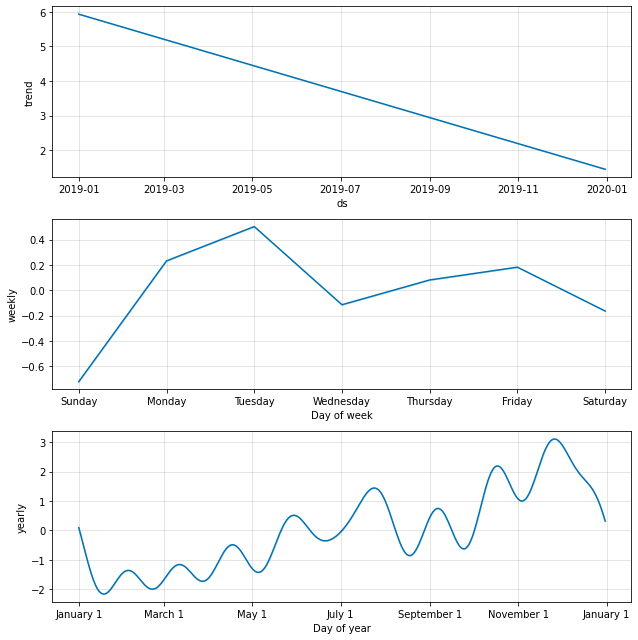

In [17]:
fig2 = model.plot_components(forecast_train)

# Amazon DeepAR

In [54]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.mx.trainer import Trainer
from gluonts.dataset.common import ListDataset
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('product_dataset.csv')

In [23]:
del df['Ordered_Product_Id']

In [24]:
df = df.set_index('order_date')

In [25]:
df

,qty
order_date,
2019-01-01,7
2019-01-03,4
2019-01-04,1
2019-01-05,6
2019-01-06,3
...,...
2020-12-02,2
2020-12-03,4
2020-12-04,9


In [45]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.qty[:"2020-11-05 00:00:00"]}],
    freq = "D"
)

In [46]:
trainer = Trainer(epochs=10)
predictor = deepar.DeepAREstimator(freq="D", prediction_length=7, trainer=trainer)

In [64]:
predictor = predictor.train(training_data)

In [62]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.qty[:"2020-11-05 00:00:00"]}],
    freq = "D"
)

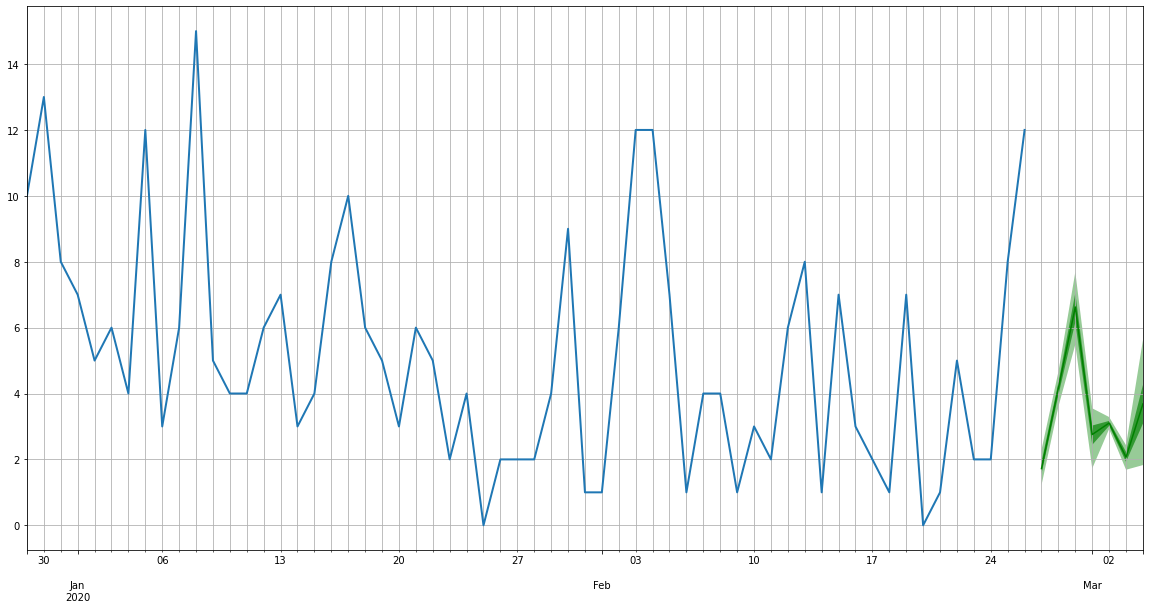

In [63]:
from gluonts.dataset.util import to_pandas

plt.figure(figsize=(20,10))
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')